In [1]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import tensorflow as tf
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
test_dir = "E:\Machine Learning\cell_images\cell_prediction"
test_imgs = ["E:\Machine Learning\cell_images\cell_prediction\{}".format(i) for i in os.listdir(test_dir)]
#.format()函数用于把文件名加入前面的{}中
#该语句加入了[]，在后续读取多个图像路径的时候无法拆分，会导致从第二个图片开始发生错误，如下个代码框中所示
#在OS系统中可以如此操作，但在WIN系统中建议换append函数来存储路径
nrows = 150
ncolumns = 150
channels = 1
train_data = []

In [ ]:
'''
print(test_imgs[0])
print(test_imgs[0:1])
print(test_imgs[0:2])
结果为：
E:\Machine Learning\cell_images\cell_prediction\C1_thinF_IMG_20150604_104919_cell_123.png
['E:\\Machine Learning\\cell_images\\cell_prediction\\C1_thinF_IMG_20150604_104919_cell_123.png']
['E:\\Machine Learning\\cell_images\\cell_prediction\\C1_thinF_IMG_20150604_104919_cell_123.png',
 'E:\\Machine Learning\\cell_images\\cell_prediction\\C1_thinF_IMG_20150604_104919_cell_132.png']
因此，建议用os命令（.path.join和.listdir）加上for try except函数来进行图片读取和重定义
'''

In [3]:
#统一图片尺寸，生成特征数据集和标签
def create_train_data(): #定义函数
    X = []
    #y = []
    #class_num = 0
    for img in os.listdir(test_dir): #返回指定的文件夹包含的文件或文件夹的名字的列表
        try: #用try来抓取图像文件坏了而引起的异常，如果遇到了异常则跳过
            img_array = cv2.imread(os.path.join(test_dir, img),cv2.IMREAD_GRAYSCALE) #读入图片，黑白模式
            new_array = cv2.resize(img_array, (nrows, ncolumns)) #规定图片尺寸
            train_data.append(new_array)
           # train_data.append([new_array,class_num])  #将图像和标签加入训练集中，[]中的参数一一对应
        except Exception as e:
            pass

create_train_data() #执行函数
test_X = []
#test_y = []
for feature in train_data:
    test_X.append(feature)
    
x = np.array(test_X).reshape(-1,nrows, ncolumns,1) 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
x.shape

(20, 150, 150, 1)

In [ ]:
def  read_and_process_image(list_of_images):
    X = []
    y = []
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_GRAYSCALE), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        #img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        #new_array = cv2.resize(img_array, (nrows, ncolumns), interpolation = cv2.INTER_CUBIC)
        #X.append(new_array)
        if 'Parasitized' in image:
            y.append(0)
        elif 'Uninfected' in image:
            y.append(1)
        return X, y

X_test, y_test = read_and_process_image(test_imgs[0])
#X_test, y_test = read_and_process_image(test_imgs[1:2])
#X_test, y_test = read_and_process_image(test_imgs[0:9])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
X_test = []
y_test = []
for Read_imgs in range(9):
    X_temp, y_temp = read_and_process_image(test_imgs[Read_imgs:Read_imgs + 1])
    X_test.append(X_temp)
    y_test.append(y_temp)
    if Read_imgs >= 9:
        break

In [ ]:
#x = np.transpose(x, (0,2,3,1)) #改变秩中数据的顺序
x = x.reshape(x.shape + (1,)) #增加秩

In [7]:
model = tf.keras.models.load_model(r'C:\Users\lenovo\Python3\trained model\64-3CNN_ver2.model')

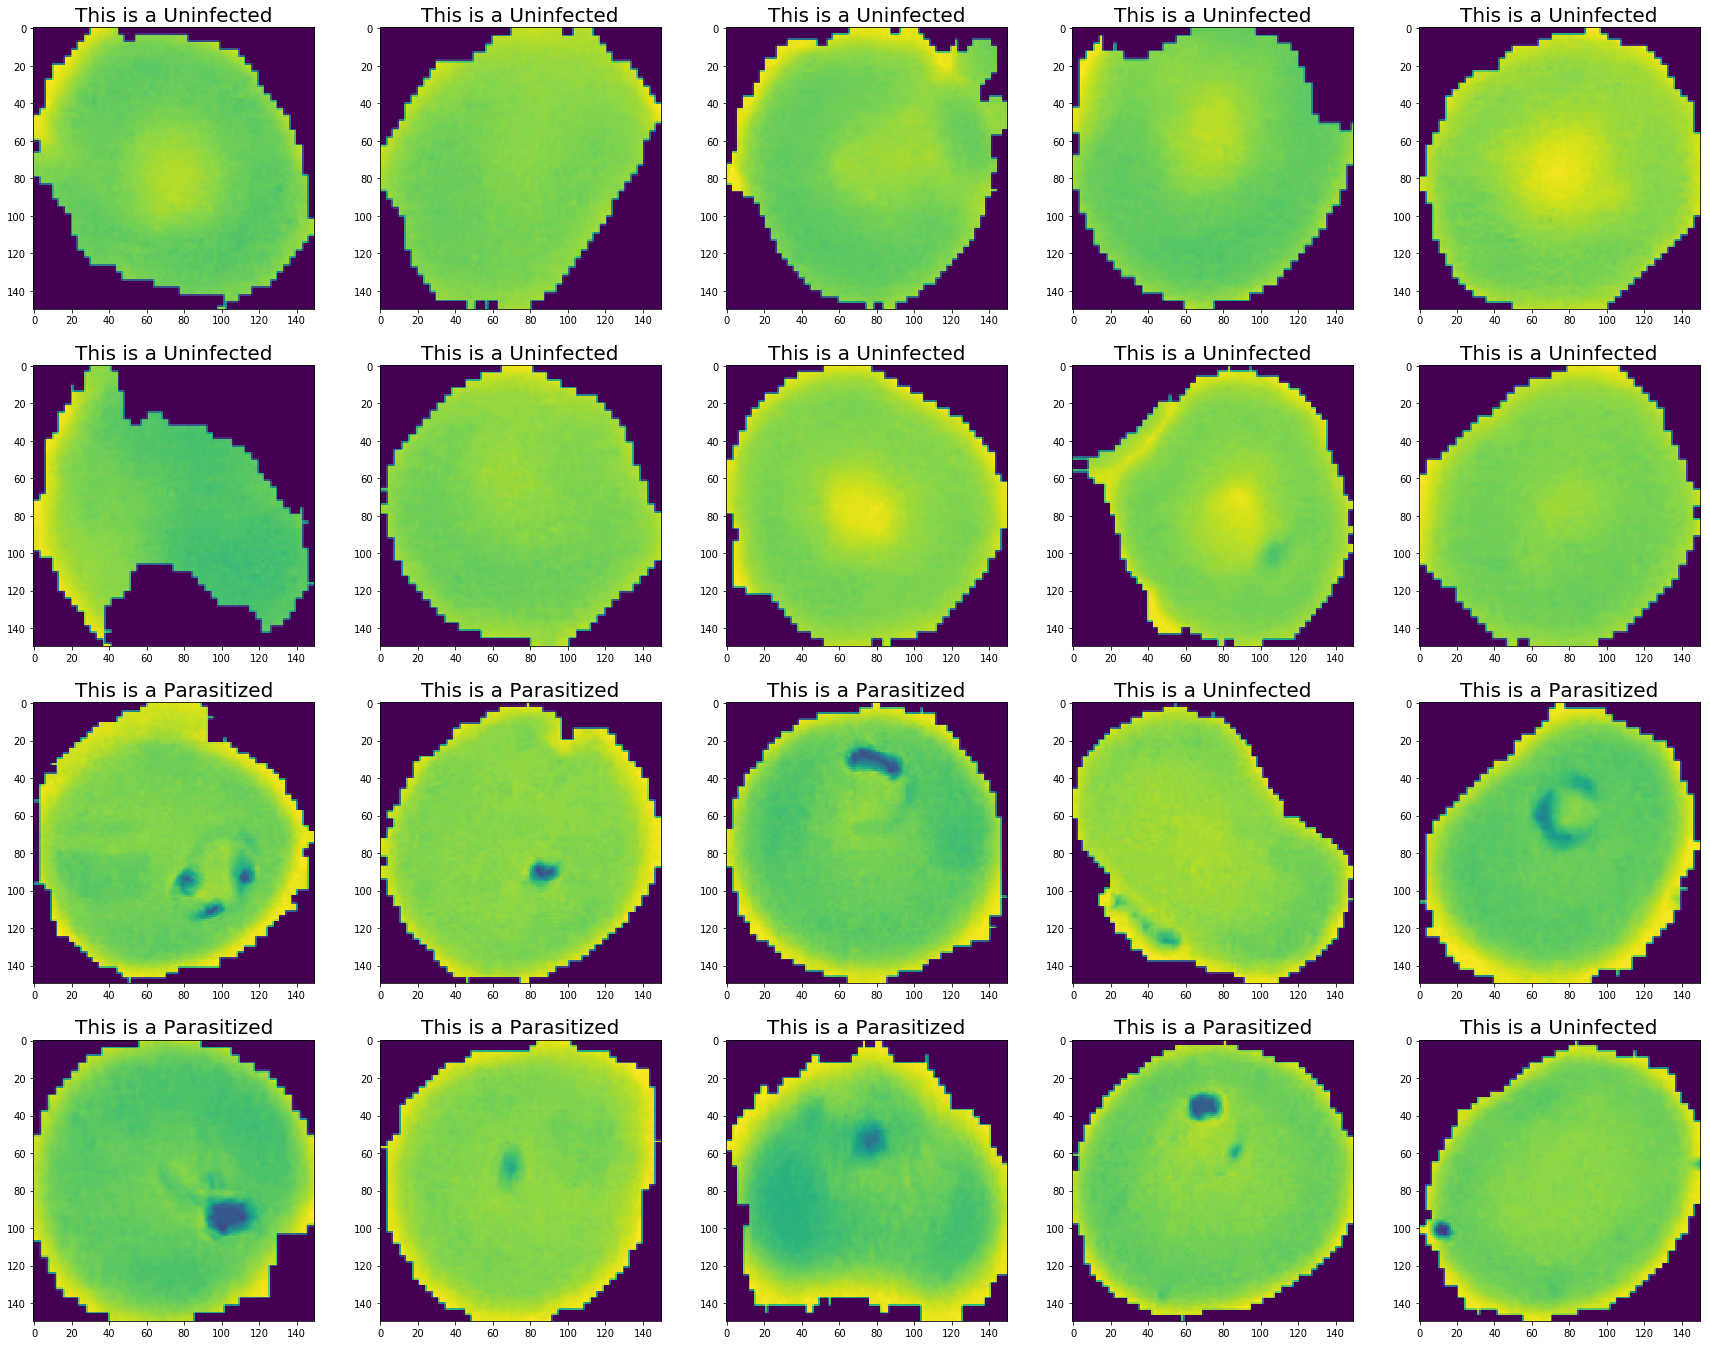

In [8]:
Nnum = 0
text_labels = []
plt.figure(figsize=(30,30))
columns = 5
for batch in test_datagen.flow(x, batch_size = 1, shuffle = False):
    pred = model.predict(batch)
    if any(pred > 0.5):
        text_labels.append('Uninfected')
    else:
        text_labels.append('Parasitized')
    plt.subplot(20 / columns + 1, columns, Nnum + 1)
    plt.title('This is a ' + text_labels[Nnum], fontsize=20)
    
    image_temp = batch[0].reshape(150, 150)
    imgplot = plt.imshow(image_temp)
    
    Nnum += 1
    if Nnum % 20 == 0:
        break
plt.show()

In [ ]:
pred